##DATASET LOADIND AND SHUFFLING

In [1]:
import pandas as pd
import numpy as np # linear algebra
import sklearn

In [ ]:
df_OCD = pd.read_csv("/content/drive/MyDrive/323 final/PR/Annotated/Vader_OCD.csv")
df_anxiety=pd.read_csv("/content/drive/MyDrive/323 final/PR/Annotated/Vader_anxiety_usa.csv")
df_depression=pd.read_csv("/content/drive/MyDrive/323 final/PR/Annotated/Vader_depression.csv")
df_ed=pd.read_csv("/content/drive/MyDrive/323 final/PR/Annotated/Vader_eating_disorder.csv")
df_schi=pd.read_csv("/content/drive/MyDrive/323 final/PR/Annotated/Vader_schizophrenia.csv")
df_stress=pd.read_csv("/content/drive/MyDrive/323 final/PR/Annotated/Vader_stress.csv")
df_abuse=pd.read_csv("/content/drive/MyDrive/323 final/PR/Annotated/Vader_substance_abuse.csv")

In [ ]:
df_all=pd.concat([df_OCD,df_anxiety,df_depression,df_ed,df_schi,df_stress,df_abuse],ignore_index=True)

In [ ]:
df_all.to_csv("concatenated.csv")

In [ ]:
df_all=df_all[["Text",'tidy_tweet',"comp_score"]]


In [ ]:
df_all.head()

,Text,tidy_tweet,comp_score
0,today i officially diagnosed obsessive compuls...,today i offici diagno obsess compul disord sen...,neg
1,tested pill depression obsessive compulsive di...,test pill depress obsess compul disord known r...,neu
2,ocd cleaningobsessive compulsive disorder ocd ...,ocd cleaningobsess compul disord ocd disord pe...,neg
3,all i talking opinion oral like prostate exam ...,all i talk opinion oral like prostat exam tong...,neu
4,pamela schuller reminisces diagnosed worse cas...,pamela schuller reminisc diagno wor case toure...,neg


In [ ]:
df_all.reset_index(inplace=True)

In [ ]:
df_all["comp_score"].value_counts()

neu    22457
neg     5950
pos     4112
Name: comp_score, dtype: int64

In [ ]:
df_all = df_all.dropna()
df_all = df_all.drop_duplicates()

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df_all.comp_score)
df_all['Target'] = le.transform(df_all.comp_score)

In [ ]:
df_all["comp_score"].value_counts()

neu    22456
neg     5950
pos     4112
Name: comp_score, dtype: int64

In [ ]:
import random

index = [i for i in range(df_all.shape[0])]
random.shuffle(index)
df_all=df_all.set_index([index]).sort_index()

In [ ]:
import sklearn
df_all=sklearn.utils.shuffle(df_all)
print(df_all)

       index  ... Target
20859   6629  ...      0
428    24528  ...      2
12374  15192  ...      1
25957  28831  ...      1
458     5197  ...      1
...      ...  ...    ...
6122   11550  ...      1
28358  16856  ...      1
13151   3796  ...      0
1398   13059  ...      1
1515   18241  ...      1

[32518 rows x 5 columns]


In [ ]:
df_all.head(n=50)

,index,Text,tidy_tweet,comp_score,Target
20859,6629,awkward anxiety filled day fuck man,awkward anxieti fill day fuck man,neg,0
428,24528,the stress life feel like broken resiliency ha...,the stress life feel like broken resili hand h...,pos,2
12374,15192,not correct either you remember years ago wome...,not correct either you rememb year ago women c...,neu,1
25957,28831,the new book here get started early holiday sh...,the new book here get start earli holiday shop...,neu,1
458,5197,flight completely full know means anxiety thro...,flight complet full know mean anxieti through ...,neu,1
4943,26919,skipped walking fri sun probably good this aft...,skip walk fri sun probabl good thi afternoon h...,pos,2
13683,4434,trying alleviate range anxiety big reason peop...,tri allevi rang anxieti big reason peopl buy e...,neu,1
31161,15883,exhausted thing causes reach depression hours ...,exhaust thing cau reach depress hour simpli fa...,neu,1
4513,21534,people puzzle i equation so sheltered i though...,peopl puzzl i equat so shelter i thought thoug...,neu,1
4218,3583,happy birthday thank pulling dark times helpin...,happi birthday thank pull dark time help anxieti,pos,2


In [ ]:
df_all.to_csv("all_data.csv")



##Preprocess

In [3]:
!pip install tweet-preprocessor

In [ ]:
import preprocessor as p


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1.count()
df1=df1[['Datetime','Text','label']]

In [ ]:
df1 = df1.dropna()
df1 = df1.drop_duplicates()

In [ ]:
df1=df1.reset_index()


Contraction expansion

In [2]:
!pip install contractions

     |████████████████████████████████| 284 kB 30.9 MB/s 
     |████████████████████████████████| 321 kB 30.3 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85452 sha256=ea6c12a2a17ebbfb95117032b4a538ea0700d3b0c743a0de3663cdbec9c5b7ec
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
import contractions as c

In [ ]:
def contraction_expand_tweet(row):
    text = row['Text']
    text = c.fix(text)
    return text

In [ ]:
df1['Text'] = df1.apply(contraction_expand_tweet, axis=1)

Cleaning

In [ ]:
def preprocess_tweet(row):
    text = row['Text']
    text = p.clean(text)
    return text

In [ ]:
df1['Text'] = df1.apply(preprocess_tweet, axis=1)

In [ ]:
df1.head()

Clearing html marks (&amp)

In [ ]:
from bs4 import BeautifulSoup


In [ ]:
def html_char_removal(row):
    text = row['Text']
    text = BeautifulSoup(text).get_text()

    return text

In [ ]:
df1['Text'] = df1.apply(html_char_removal, axis=1)

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [ ]:
df1.head()

Extracting English Tweets

In [ ]:
!pip install langdetect

     |████████████████████████████████| 981 kB 5.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=48227ca9e261933348d2e3973b1ed30380a323555328f3a4befff2a78629c18c
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
from langdetect import detect

def detect_lang(txt):
  try:
    return detect(txt)
  except:
    return np.nan

text="Bonsoir"
detect_lang(text)

#data["language"] = data.cleaned_text.apply(detect_lang)

'fr'

In [ ]:
df1["lang"]=df1.Text.apply(detect_lang)

In [ ]:
new_data = df1[df1.lang == "en"]
new_data.reset_index(inplace = True)


In [ ]:
df1=new_data

In [ ]:
df1.head()

In [ ]:
df1.label.value_counts()

In [ ]:
df1.count()

Stopward removal

In [4]:
!pip install gensim

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords

In [ ]:
def stopword_removal(row):
    text = row['Text']
    text = remove_stopwords(text)
    return text

In [ ]:
df1['Text'] = df1.apply(stopword_removal, axis=1)

In [ ]:
df1['Text'] = df1['Text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

In [ ]:
df1.head()

Tokenaizing

In [ ]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
df1['tokens'] = df1['Text'].apply(tknzr.tokenize)

In [ ]:
df1.head()

In [ ]:
df1.to_csv('pre_primary_annotation2.csv')

In [ ]:
import seaborn as sns
from matplotlib import rcParams


In [ ]:
f = sns.countplot(x='label', data=df1 )
rcParams['figure.figsize'] = 41.7,57
f.set_title("Tweet Distribution")






Stemming

In [ ]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
df1['normalized_tweets'] = df1['tokens'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
df1.head()

In [ ]:
!pip install wordcloud

In [ ]:
normalized_tweets = df1['normalized_tweets'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
normalized_tweets.head()

In [ ]:
df1.to_csv("inspect.csv")

In [ ]:

for i in range(len(normalized_tweets)):
    
    normalized_tweets[i] = ' '.join(normalized_tweets[i])    
df1['tidy_tweet'] = normalized_tweets
df1.head(10)

##TFIDF

In [ ]:
y=[0,1,2]
le.inverse_transform(y)

array(['neg', 'neu', 'pos'], dtype=object)

In [ ]:
df_all=pd.read_csv()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english',max_features=5000)
#tfidf=TfidfVectorizer(max_features=5000)
features = tfidf.fit_transform(df_all.tidy_tweet).toarray()
#labels = df1.Target
features.shape

(32518, 5000)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample =SMOTE()
from imblearn.over_sampling import ADASYN

#oversample = ADASYN()

In [ ]:
from sklearn.model_selection import train_test_split
xtrain_tfidf, xtest_tfidf, ytrain, ytest = train_test_split(features, df_all['Target'], random_state=42, test_size=0.3)

In [ ]:
xtrain_tfidf,ytrain=oversample.fit_resample(xtrain_tfidf,ytrain)
xtest_tfidf,ytest=oversample.fit_resample(xtest_tfidf,ytest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=1000,max_depth=200)
rf1.fit(xtrain_tfidf,ytrain).score(xtest_tfidf,ytest)

0.8382499006754073

END


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

evaluation = pd.DataFrame({'Model': [],
                           'Precision(train)':[],
                           'Recall(train)':[],
                           'F1_score(train)':[],
                           'Precision(test)':[],
                           'Recal(test)':[],
                           'F1_score(test)':[]})

In [ ]:
precision_train=format(precision_score(ytrain, rf1.predict(xtrain_tfidf), average='macro'),'.3f')
recall_train=format(recall_score(ytrain, rf1.predict(xtrain_tfidf), average='macro'),'.3f')
f1_train=format(f1_score(ytrain, rf1.predict(xtrain_tfidf), average='macro'),'.3f')


precision_test=format(precision_score(ytest, rf1.predict(xtest_tfidf), average='macro'),'.3f')
recall_test=format(recall_score(ytest, rf1.predict(xtest_tfidf), average='macro'),'.3f')
f1_test=format(f1_score(ytest, rf1.predict(xtest_tfidf), average='macro'),'.3f')
r = evaluation.shape[0]
evaluation.loc[r] = ['rf_tfidf',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,rf_tfidf,0.894,0.892,0.893,0.839,0.838,0.838


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, rf1.predict(xtest_tfidf)))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      6712
           1       0.79      0.80      0.79      6712
           2       0.87      0.90      0.88      6712

    accuracy                           0.84     20136
   macro avg       0.84      0.84      0.84     20136
weighted avg       0.84      0.84      0.84     20136



In [ ]:
pred_lreg=rf1.predict_proba(xtest_tfidf)

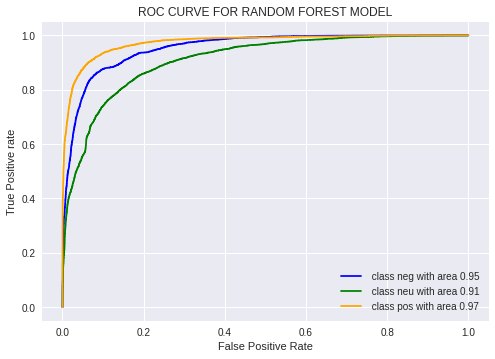

In [ ]:
# roc curve for classes
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 3
y=[0,1,2]
color=['blue','green','orange']
labels=le.inverse_transform(y)
#format(a, '.2f') 

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, pred_lreg[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], linestyle='-',color=color[i], label=' class '+str(labels[i])+' with area '+str(format(roc_auc[i],'.2f')))
    #le.inverse_transform(i)
# plotting    
rcParams['figure.figsize'] = 31.7,47
plt.title('ROC CURVE FOR RANDOM FOREST MODEL')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('RF ROC',dpi=300); 

In [ ]:
! pip install -q scikit-plot

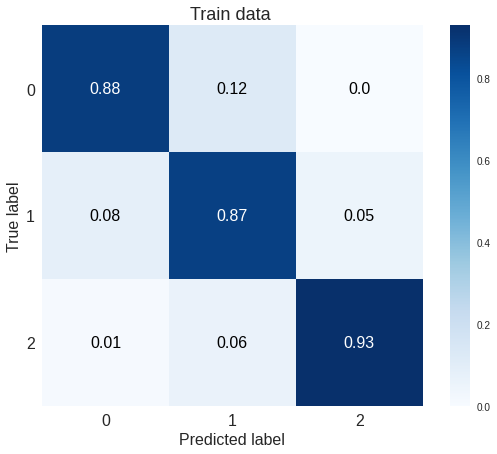

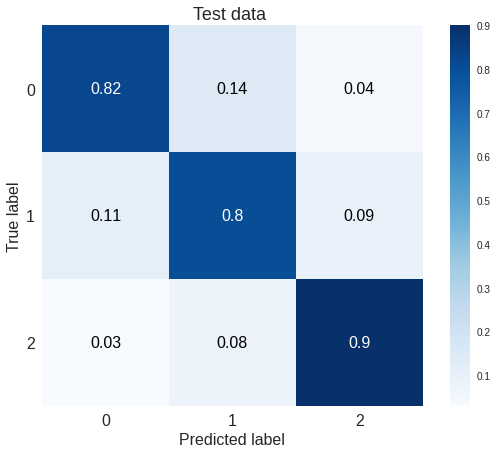

In [ ]:
import scikitplot as skplt 
ltrain=rf1.predict(xtrain_tfidf)
ltest=rf1.predict(xtest_tfidf)
skplt.metrics.plot_confusion_matrix(
    ytrain, 
    ltrain,
    figsize=(10,7),
    title_fontsize='18',
    text_fontsize='16',
    title ='Train data ',
    cmap='Blues',
    normalize=True
    )
plt.savefig('rf1-train',dpi=300);
skplt.metrics.plot_confusion_matrix(
    ytest, 
    ltest,
    figsize=(10,7),
    title_fontsize='18',
    text_fontsize='16',
    title ='Test data ',
    cmap='Blues',
    normalize=True
   
    )
plt.savefig('rf2-test',dpi=300);
 

In [6]:
!pip install lime

     |████████████████████████████████| 275 kB 22.4 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=7bdc1f6060a1df6887e3218dfa9d3eb7dd85bb0f7de0cb2a40a091be26b2c6ef
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [7]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 20.1 MB/s 
     |████████████████████████████████| 895 kB 24.6 MB/s 
     |████████████████████████████████| 596 kB 33.1 MB/s 
     |████████████████████████████████| 61 kB 330 kB/s 
     |████████████████████████████████| 3.3 MB 51.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## WORD 2 VEC

In [8]:
## for data
import json
import pandas as pd
import numpy as np## for plotting
import matplotlib.pyplot as plt
import seaborn as sns## for processing
import re
import nltk## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing## for explainer
from lime import lime_text## for word embedding
import gensim
import gensim.downloader as gensim_api## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K## for bert language model
import transformers
from tensorflow.python.keras import regularizers

In [11]:
df_all=pd.read_csv("/content/drive/MyDrive/323 final/PR/Annotated/all_data.csv")

In [ ]:
df_all.head()

,Text,tidy_tweet,comp_score,Target
0,i need depression sucked outta memary jane eno...,i need depress suck outta memari jane enough,neu,1
1,it nice hold football induced stress sunday,it nice hold footbal induc stress sunday,neu,1
2,i swear i suffer seasonal depression summer th...,i swear i suffer season depress summer thank c...,neg,0
3,was transformational conversation,wa transform conver,neu,1
4,i got twitter giving anxiety,i got twitter give anxieti,neu,1


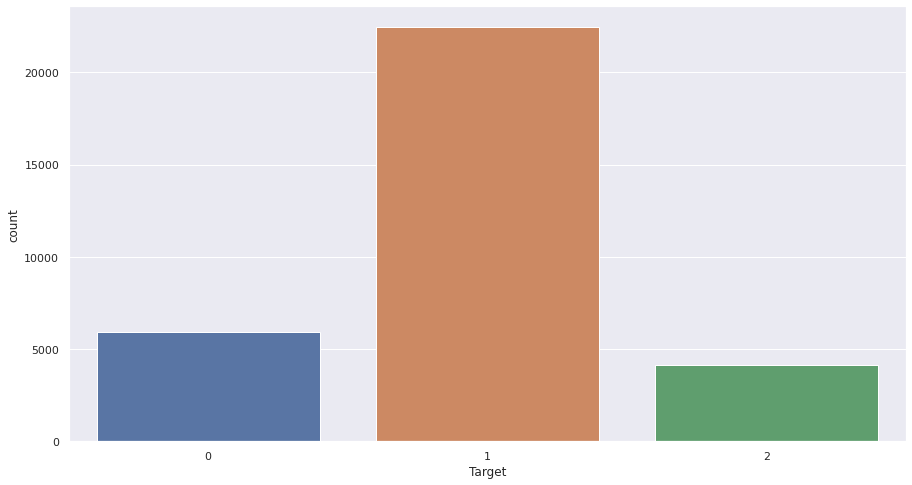

In [ ]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x=df_all["Target"], data=df_all)

#plt.figure(figsize=(10, 7)) 
#plt.imshow(wordcloud, interpolation="bilinear") 

#plt.axis('off')
plt.savefig("label_countplot.pdf",dpi=300)
plt.show()

In [ ]:
  import nltk
  nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
## split dataset
dtf_train, dtf_test = model_selection.train_test_split(df_all, test_size=0.3,random_state=42)
## get target
y_train = dtf_train["Target"].values
y_test = dtf_test["Target"].values

In [ ]:
nlp = gensim_api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
corpus = dtf_train["Text"]
## create list of lists of unigrams
lst_corpus = []
for string in corpus:
   lst_words = string.split()
   lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
   lst_corpus.append(lst_grams)
## detect bigrams and trigrams
bigrams_detector = gensim.models.phrases.Phrases(lst_corpus, 
                 delimiter=" ".encode(), min_count=5, threshold=10)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[lst_corpus], 
            delimiter=" ".encode(), min_count=5, threshold=10)
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

In [ ]:
nlp = gensim.models.word2vec.Word2Vec(lst_corpus, size=300,   
            window=8, min_count=1, sg=1, iter=30)

In [ ]:
nlp.corpus_count

22762

In [ ]:
word = "anxiety"
nlp[word].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(300,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

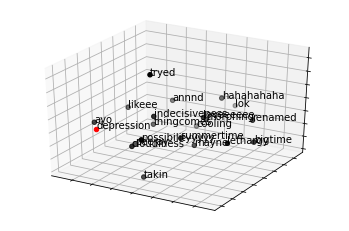

In [ ]:
word = "depression"
fig = plt.figure()## word embedding
tot_words = [word] + [tupla[0] for tupla in 
                 nlp.most_similar(word, topn=20)]
X = nlp[tot_words]## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1## plot 3d
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], 
           dtf_[dtf_["input"]==0]['y'], 
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], 
           dtf_[dtf_["input"]==1]['y'], 
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label)

In [ ]:
## tokenize text
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', 
                     oov_token="NaN", 
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(lst_corpus)
dic_vocabulary = tokenizer.word_index## create sequence
lst_text2seq= tokenizer.texts_to_sequences(lst_corpus)## padding sequence
X_train = kprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=15, padding="post", truncating="post")

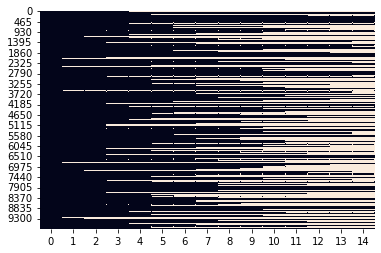

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.heatmap(X_train==0, vmin=0, vmax=1, cbar=False)
plt.show()
plt.savefig('W2V-heatmap',dpi=300); 

In [ ]:
i=0
## list of text: ["I like this", ...]
len_txt = len(dtf_train["Text"].iloc[i].split())
print("from: ", dtf_train["Text"].iloc[i], "| len:", len_txt)

## sequence of token ids: [[1, 2, 3], ...]
len_tokens = len(X_train[i])
print("to: ", X_train[i], "| len:", len(X_train[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", dtf_train["Text"].iloc[i].split()[0], 
      " -- idx in vocabulary -->", 
      dic_vocabulary[dtf_train["Text"].iloc[i].split()[0]])

print("vocabulary: ", dict(list(dic_vocabulary.items())[0:5]), "... (padding element, 0)")

from:  article fwb taking care suffering depression  | len: 6
to:  [  71 3019  289   26  229 3502 3503  590 2329 3504 7744 4256    0    0
    0] | len: 15
check:  article  -- idx in vocabulary --> 1007
vocabulary:  {'NaN': 1, 'i': 2, 'anxiety': 3, 'depression': 4, 'stress': 5} ... (padding element, 0)


In [ ]:
corpus = dtf_test["Text"]
## create list of n-grams
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, 
                 len(lst_words), 1)]
    lst_corpus.append(lst_grams)
    ## detect common bigrams and trigrams using the fitted detectors
lst_corpus = list(bigrams_detector[lst_corpus])
lst_corpus = list(trigrams_detector[lst_corpus])
## text to sequence with the fitted tokenizer
lst_text2seq = tokenizer.texts_to_sequences(lst_corpus)
## padding sequence
X_test = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=15,
             padding="post", truncating="post")

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=10)
selected_features = selector.fit_transform(X_train,y_train)

In [ ]:


X_train,y_train=oversample.fit_resample(X_train,y_train)
X_test,y_test=oversample.fit_resample(X_test,y_test)

In [ ]:
y_test.shape

In [ ]:
## start the matrix (length of vocabulary x vector size) with all 0s
embeddings = np.zeros((len(dic_vocabulary)+1, 300))
for word,idx in dic_vocabulary.items():
    ## update the row with vector
    try:
        embeddings[idx] =  nlp[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
embeddings.shape[0]

23043

In [ ]:
word = "data"
print("dic[word]:", dic_vocabulary[word], "|idx")
print("embeddings[idx]:", embeddings[dic_vocabulary[word]].shape, 
      "|vector")

dic[word]: 1143 |idx
embeddings[idx]: (300,) |vector


##GLOVE

In [12]:
max_features = 11000
maxlen = 200

In [13]:
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence

In [16]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(dtf_train['Text'])
tokenized_train = tokenizer.texts_to_sequences(dtf_train['Text'])
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [ ]:
tokenized_test = tokenizer.texts_to_sequences(dtf_test['Text'])
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

#EMBEDDING_FILE = '../input/glove-twitter/glove.twitter.27B.200d.txt'



In [ ]:
#!mkdir data/glove
!mkdir glove_twitter

#/content/glove.twitter.27B.zip

!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip
#!wget http://nlp.stanford.edu/data/glove.6B.zip

!unzip glove.twitter.27B.zip -d glove_twitter
#!unzip glove.6B.zip -d data/glove

--2022-01-09 16:10:07--  http://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.twitter.27B.zip [following]
--2022-01-09 16:10:07--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2022-01-09 16:10:07--  http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [appli

In [ ]:
EMBEDDING_FILE = '/content/glove_twitter/glove.twitter.27B.200d.txt'

In [ ]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [ ]:
x_train,y_train=oversample.fit_resample(x_train,y_train)
X_test,y_test=oversample.fit_resample(X_test,y_test)

##RNN-bi LSTM

In [ ]:
## code attention layer
def attention_layer(inputs, neurons):
    x = layers.Permute((2,1))(inputs)
    x = layers.Dense(neurons, activation="softmax")(x)
    x = layers.Permute((2,1), name="attention")(x)
    x = layers.multiply([inputs, x])
    return x
## input
x_in = layers.Input(shape=(15,))## embedding
x = layers.Embedding(input_dim=embeddings.shape[0],  
                     output_dim=embeddings.shape[1], 
                     weights=[embeddings],
                     input_length=15, trainable=False)(x_in)## apply attention
x = attention_layer(x, neurons=15)## 2 layers of bidirectional lstm
x = layers.Bidirectional(layers.LSTM(units=15, dropout=0.5, 
                         return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(units=15, dropout=0.5))(x)## final dense layers
x = layers.Dense(15, kernel_regularizer=regularizers.l2((0.001)),activation='relu')(x)
y_out = layers.Dense(3, activation='softmax')(x)## compile
model = models.Model(x_in, y_out)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary()

In [ ]:
## code attention layer
def attention_layer(inputs, neurons):
    x = layers.Permute((2,1))(inputs)
    x = layers.Dense(neurons, activation="softmax")(x)
    x = layers.Permute((2,1), name="attention")(x)
    x = layers.multiply([inputs, x])
    return x
## input
x_in = layers.Input(shape=(15,))## embedding
x = layers.Embedding(input_dim=embeddings.shape[0],  
                     output_dim=embeddings.shape[1], 
                     weights=[embeddings],
                     input_length=15, trainable=False)(x_in)## apply attention
x = attention_layer(x, neurons=15)## 2 layers of bidirectional lstm
x = layers.Bidirectional(layers.LSTM(units=15, dropout=0.4, 
                         return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(units=15, dropout=0.5))(x)## final dense layers
x = layers.Dense(32, activation='relu')(x)
y_out = layers.Dense(3, activation='softmax')(x)## compile
model2 = models.Model(x_in, y_out)
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model2.summary()



Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 15)]         0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 15, 300)      6912900     ['input_5[0][0]']                
                                                                                                  
 permute_4 (Permute)            (None, 300, 15)      0           ['embedding_4[0][0]']            
                                                                                                  
 dense_12 (Dense)               (None, 300, 15)      240         ['permute_4[0][0]']              
                                                                                            

In [ ]:
y_test.shape

In [ ]:
from keras.initializers import Constant
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto')

In [ ]:
## model2
dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_train = np.array([inverse_dic[y] for y in y_train])## train
training = model2.fit(x=X_train, y=y_train, batch_size=256, 
                     epochs=1000, shuffle=True, verbose=1, 
                     validation_split=0.3)## plot loss and accuracy
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.savefig('results',dpi=300)
plt.show()
#plt.savefig('results',dpi=300)

Epoch 1/1000
63/63 [==============================] - 10s 158ms/step - loss: 0.4130 - accuracy: 0.8272 - val_loss: 0.5355 - val_accuracy: 0.7736
Epoch 2/1000
63/63 [==============================] - 10s 158ms/step - loss: 0.4209 - accuracy: 0.8236 - val_loss: 0.5369 - val_accuracy: 0.7755
Epoch 3/1000
63/63 [==============================] - 10s 158ms/step - loss: 0.4209 - accuracy: 0.8252 - val_loss: 0.5298 - val_accuracy: 0.7727
Epoch 4/1000
63/63 [==============================] - 10s 158ms/step - loss: 0.4237 - accuracy: 0.8224 - val_loss: 0.5328 - val_accuracy: 0.7729
Epoch 5/1000
63/63 [==============================] - 10s 158ms/step - loss: 0.4169 - accuracy: 0.8250 - val_loss: 0.5285 - val_accuracy: 0.7779
Epoch 6/1000
63/63 [==============================] - 10s 158ms/step - loss: 0.4163 - accuracy: 0.8293 - val_loss: 0.5281 - val_accuracy: 0.7742
Epoch 7/1000
63/63 [==============================] - 10s 158ms/step - loss: 0.4116 - accuracy: 0.8257 - val_loss: 0.5360 - val_ac

KeyboardInterrupt: ignored

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
#Defining Neural Network
model3 = Sequential()
#Non-trainable embeddidng layer
model3.add(Embedding(nb_words, output_dim=embed_size, weights=[embedding_matrix], input_length=200, trainable=False))
#LSTM 
model3.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.5 , dropout = 0.5)))
model3.add(Dense(3, activation='softmax'))
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 200)          2200000   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              336896    
 l)                                                              
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
Total params: 2,537,667
Trainable params: 337,667
Non-trainable params: 2,200,000
_________________________________________________________________


In [ ]:
!pip install keras.utils

  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=c3bd006110a4a16e99a9fb5f1ea0eb0fa5b1b06f44fea2fe02cfe001688a9d37
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


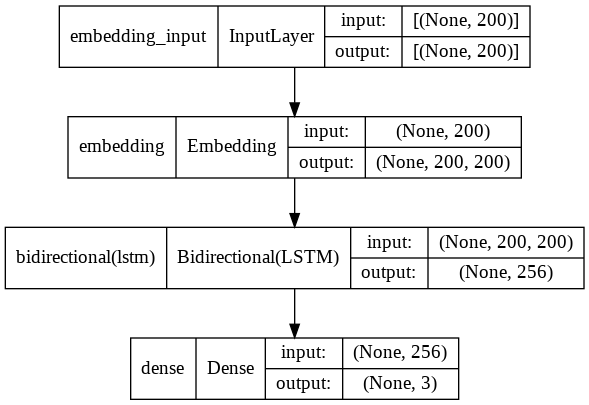

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model3, show_shapes=True)

In [ ]:
plot_model.savefig("model.png",dpi=300)

In [ ]:
## Glove
dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_train = np.array([inverse_dic[y] for y in y_train])## train
training = model3.fit(x=x_train, y=y_train, batch_size=256, 
                     epochs=50, shuffle=True, verbose=1, 
                     validation_data=(X_test, y_test),callbacks=[checkpoint])## plot loss and accuracy
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()
plt.savefig('results2',dpi=300)

Epoch 1/50
89/89 [==============================] - ETA: 0s - loss: 0.4998 - accuracy: 0.7826
Epoch 00001: val_accuracy improved from 0.78301 to 0.80084, saving model to model-001-0.800840.h5
89/89 [==============================] - 453s 5s/step - loss: 0.4998 - accuracy: 0.7826 - val_loss: 0.4576 - val_accuracy: 0.8008
Epoch 2/50
89/89 [==============================] - ETA: 0s - loss: 0.4793 - accuracy: 0.7935
Epoch 00002: val_accuracy improved from 0.80084 to 0.81365, saving model to model-002-0.813653.h5
89/89 [==============================] - 457s 5s/step - loss: 0.4793 - accuracy: 0.7935 - val_loss: 0.4412 - val_accuracy: 0.8137
Epoch 3/50
89/89 [==============================] - ETA: 0s - loss: 0.4571 - accuracy: 0.8057
Epoch 00003: val_accuracy did not improve from 0.81365
89/89 [==============================] - 456s 5s/step - loss: 0.4571 - accuracy: 0.8057 - val_loss: 0.4335 - val_accuracy: 0.8128
Epoch 4/50
89/89 [==============================] - ETA: 0s - loss: 0.4450 - 

In [ ]:
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()
plt.savefig('results2',dpi=300)

##Evaluation

In [17]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/323 final/PR/model-041-0.850143.h5')


In [ ]:
predicted_prob = model.predict(X_test)
predicted = [dic_y_mapping[np.argmax(pred)] for pred in 
             predicted_prob]

In [ ]:
ypred_test = np.argmax(predicted_prob, axis = 1)

In [ ]:
print(predicted_prob)

[[2.85705522e-04 1.19395100e-01 8.80319178e-01]
 [9.91589129e-01 8.34109168e-03 6.97990763e-05]
 [9.21705738e-03 1.23049796e-01 8.67733121e-01]
 ...
 [4.54786390e-01 5.45085013e-01 1.28560583e-04]
 [2.45716929e-01 7.54131019e-01 1.52085180e-04]
 [9.68549418e-09 2.91606557e-04 9.99708354e-01]]


In [ ]:
predicted_prob4 = model.predict(x_train)
#predicted4 = [dic_y_mapping[np.argmax(pred)] for pred in 
             #predicted_prob4]

In [ ]:
ypred_train = np.argmax(predicted_prob4, axis = 1)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

evaluation = pd.DataFrame({'Model': [],
                           'Precision(train)':[],
                           'Recall(train)':[],
                           'F1_score(train)':[],
                           'Precision(test)':[],
                           'Recal(test)':[],
                           'F1_score(test)':[]})

In [ ]:
precision_train=format(precision_score(y_train, ypred_train, average='macro'),'.3f')
recall_train=format(recall_score(y_train,  ypred_train, average='macro'),'.3f')
f1_train=format(f1_score(y_train, ypred_train, average='macro'),'.3f')


precision_test=format(precision_score(y_test,ypred_test, average='macro'),'.3f')
recall_test=format(recall_score(y_test, ypred_test, average='macro'),'.3f')
f1_test=format(f1_score(y_test, ypred_test, average='macro'),'.3f')
r = evaluation.shape[0]
evaluation.loc[r] = ['RNN-biLSTM_Glove',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,RNN-biLSTM_Glove,0.941,0.952,0.947,0.803,0.802,0.803


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc,precision_recall_curve



In [ ]:
predicted_prob1 = model3.predict(X_test)
predicted1 = [dic_y_mapping[np.argmax(pred)] for pred in 
             predicted_prob1]

In [ ]:
predicted_prob2 = model3.predict(x_train)
predicted2 = [dic_y_mapping[np.argmax(pred)] for pred in 
             predicted_prob2]

In [ ]:
!pip install scikit-plot

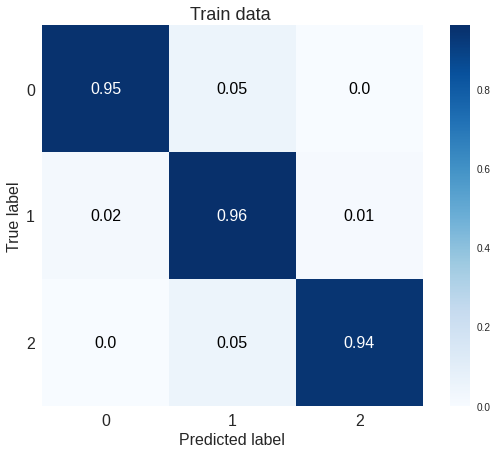

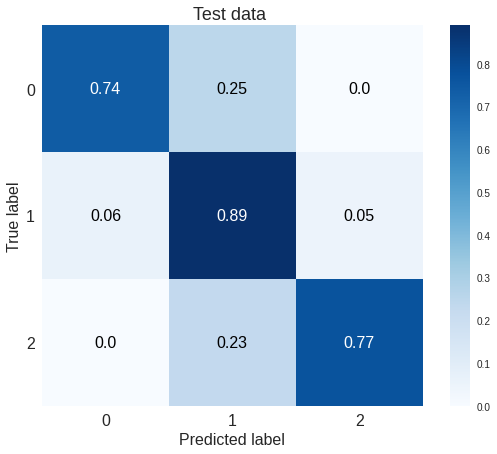

In [ ]:
import scikitplot as skplt 
ltrain=ypred_train
ltest=ypred_test
skplt.metrics.plot_confusion_matrix(
    y_train, 
    ltrain,
    figsize=(10,7),
    title_fontsize='18',
    text_fontsize='16',
    title ='Train data ',
    cmap='Blues',
    normalize=True
    )
plt.savefig('RNN-train.pdf',dpi=300);
skplt.metrics.plot_confusion_matrix(
    y_test, 
    ltest,
    figsize=(10,7),
    title_fontsize='18',
    text_fontsize='16',
    title ='Test data ',
    cmap='Blues',
    normalize=True
   
    )
plt.savefig('RNN-test.pdf',dpi=300);

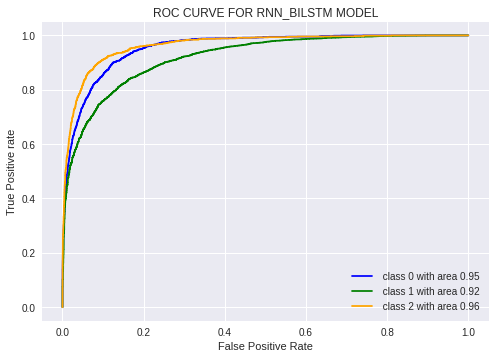

In [ ]:
pred_lreg=predicted_prob
# roc curve for classes
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams 
plt.style.use('seaborn')

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 3
y=[0,1,2]
color=['blue','green','orange']
labels=y
#format(a, '.2f') 

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_lreg[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], linestyle='-',color=color[i], label=' class '+str(labels[i])+' with area '+str(format(roc_auc[i],'.2f')))
    #le.inverse_transform(i)
# plotting    
rcParams['figure.figsize'] = 31.7,47
plt.title('ROC CURVE FOR RNN_BILSTM MODEL')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('RNN_biLSTM.pdf',dpi=300); 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1786
           1       0.89      0.89      0.89      6712
           2       0.75      0.77      0.76      1258

    accuracy                           0.85      9756
   macro avg       0.80      0.80      0.80      9756
weighted avg       0.85      0.85      0.85      9756



In [66]:
text="This anxiety #depression is killing my soul!"

In [64]:
#please keep fighting. Live for you .Control depression. Trust me you are  loved. Please hang there!
#Anxiety depression causes insomnia
#I hate #depression
#this depression killed my soul
#WordsToLiveBy It's unrealistic to think we can be #happy all of the time! Try not to #shame yourself when times are tough. Instead, remember that you've been through rough weather before and made it to the #rainbow on the other side.
#Loving ourselves can be really hard. We tend to be our own worst critics. It can be helpful when we are feeling down on ourselves to engage in self-talk like we would our best friend.

In [67]:
import preprocessor as p

import contractions as c
text=c.fix(text)
text=p.clean(text)


In [73]:
import string
regular_punct = list(string.punctuation)
def remove_punctuation(text,punct_list):
    for punc in punct_list:
        if punc in text:
            text = text.replace(punc, ' ')
    return text.strip()

text=remove_punctuation(text,regular_punct)


In [74]:
text.lower()

'this anxiety is killing my soul'

In [59]:
from gensim.parsing.preprocessing import remove_stopwords
text=remove_stopwords(text)

In [70]:
corpus = [text.lower()]
## create list of n-grams
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, 
                 len(lst_words), 1)]
    lst_corpus.append(lst_grams)
    
lst_text2seq = tokenizer.texts_to_sequences(lst_corpus)
## padding sequence
test = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=200)

In [ ]:
test

In [71]:
 np.argmax(model.predict(test),axis=1)

array([0])

In [72]:
model.predict(test)

array([[9.7360837e-01, 2.6343798e-02, 4.7771933e-05]], dtype=float32)